In [49]:
from keras.datasets import cifar10

In [50]:
(x_train,y_train) , (x_test,y_test) = cifar10.load_data()

In [51]:
x_train.shape

(50000, 32, 32, 3)

In [52]:
x_train[0].shape

(32, 32, 3)

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

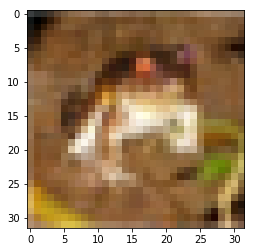

In [54]:
plt.imshow(x_train[0])

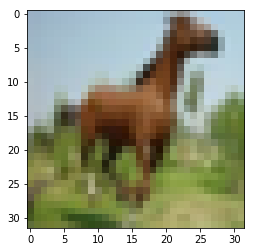

In [40]:
plt.imshow(x_train[256])

In [55]:
x_train.max()

255

In [56]:
x_train = x_train/255
x_test = x_test/255

Ahora tenemos 50.000 imágenes de aprendices y 10.000 imagenes para probar. Las cuales son de dimensiones 32x32 y con 3 canales.

In [57]:
x_test.shape

(10000, 32, 32, 3)

In [58]:
y_train.shape

(50000, 1)

In [59]:
from keras.utils.np_utils import to_categorical

In [60]:
y_category_test = to_categorical(y_test, 10)
y_category_train = to_categorical(y_train, 10)

Build a Model

In [61]:
from keras.models import Sequential

In [62]:
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [63]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3), activation='relu'))
#POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Pasar de 2D a 1D
model.add(Flatten())

#DENSE LAYER
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total para

In [66]:
model.fit(x_train,y_category_train,verbose=1,epochs=10)

Epoch 1/10
50000/50000 [==============================] - 30s 600us/step - loss: 1.5243 - acc: 0.4537
Epoch 2/10
50000/50000 [==============================] - 28s 552us/step - loss: 1.1704 - acc: 0.5896
Epoch 3/10
50000/50000 [==============================] - 28s 554us/step - loss: 1.0147 - acc: 0.6462
Epoch 4/10
50000/50000 [==============================] - 27s 544us/step - loss: 0.9084 - acc: 0.6873
Epoch 5/10
50000/50000 [==============================] - 34s 678us/step - loss: 0.8234 - acc: 0.7174
Epoch 6/10
50000/50000 [==============================] - 32s 630us/step - loss: 0.7503 - acc: 0.7396
Epoch 7/10
50000/50000 [==============================] - 34s 673us/step - loss: 0.6909 - acc: 0.7619
Epoch 8/10
50000/50000 [==============================] - 33s 658us/step - loss: 0.6380 - acc: 0.7823
Epoch 9/10
50000/50000 [==============================] - 29s 587us/step - loss: 0.5896 - acc: 0.7977
Epoch 10/10
50000/50000 [==============================] - 30s 608us/step - loss: 

In [67]:
model.metrics_names

['loss', 'acc']

In [68]:
model.evaluate(x_test,y_category_test)

10000/10000 [==============================] - 2s 170us/step


[1.2755609906196594, 0.6527]

In [69]:
from sklearn.metrics import classification_report

In [70]:
predictions = model.predict_classes(x_test)

In [71]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.76      0.57      0.65      1000
          1       0.91      0.68      0.78      1000
          2       0.57      0.57      0.57      1000
          3       0.47      0.44      0.45      1000
          4       0.58      0.66      0.62      1000
          5       0.44      0.69      0.54      1000
          6       0.85      0.68      0.75      1000
          7       0.70      0.75      0.72      1000
          8       0.72      0.81      0.76      1000
          9       0.78      0.69      0.74      1000

avg / total       0.68      0.65      0.66     10000

